<img src="https://i.imgur.com/6U6q5jQ.png"/>

# Mining Networks

We have networks available. Let's get some information out of them.

* This is the data about Peruvian elites:

In [20]:
import networkx as nx
import os

eliNet=nx.read_graphml(os.path.join('graphdata','Elitenx.graphml'))

* This is the data about international trading

In [22]:
tradeNet=nx.read_graphml(os.path.join('graphdata','trade_graph.graphml'))

* I have also prepared a network from [this article](https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow). There, we have a list of people considered key technological players in Seattle. The article gives their Twitter accounts, so I created a network using those accounts, the links meaning _someone follows someone on Twitter_.   

In [24]:
topsNet=nx.read_graphml(os.path.join('graphdata','SeattleTechTop.graphml'))

## Connectedness

In [25]:
nx.is_connected(eliNet)

False

So we have these people in components, how many?

In [26]:
numComponents=nx.number_connected_components(eliNet)
numComponents

8

What nodes are in each component?:

In [27]:
for c in nx.connected_components(eliNet):
    print (c, '\n')

{'Bustamante', 'Montero', 'Picaso', 'Berckemeyer', 'Fort', 'Wong Lu', 'Llosa Barber', 'Moreyra', 'Romero', 'Piazza', 'Raffo', 'Woodman Pollit', 'Sotomayor', 'Wiese', 'Bentin', 'Ferreyros', 'Michell', 'Rizo Patron', 'Montori', 'Beoutis Ledesma', 'Onrubia', 'Benavides', 'Nicolini', 'De La Puente', 'Graña', 'Brescia', 'Cilloniz', 'Miro Quesada'} 

{'Batievsky Spack', 'Matos Escalada', 'Galsky'} 

{'Lucioni'} 

{'Rodriguez Rodríguez'} 

{'Custer'} 

{'Ikeda'} 

{'Cogorno'} 

{'Arias Davila'} 



A visual representation follows:

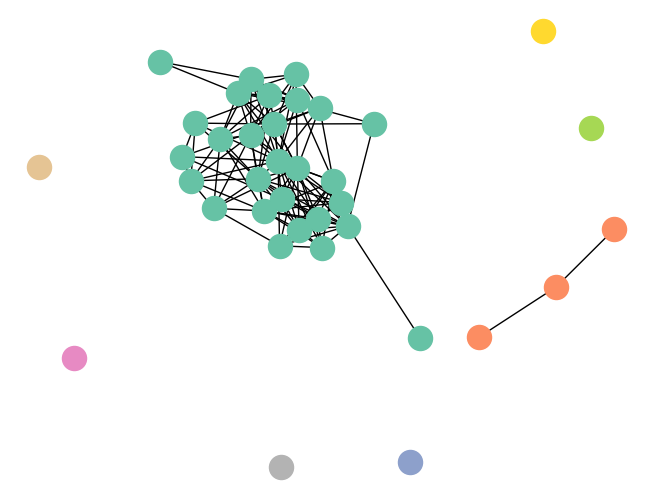

In [31]:
import matplotlib.pyplot as plt

colorsForComponents = plt.get_cmap('Set2',numComponents).colors

nodesPositions=nx.spring_layout(eliNet,k=0.5)

ConnectedComponents =(eliNet.subgraph(c).copy() for c in nx.connected_components(eliNet))

for eachComponent,eachColor in zip(ConnectedComponents,colorsForComponents):
    nx.draw(eachComponent,nodesPositions,node_color=eachColor)

As we do not have ONE connected network but several components, we can pay attention to the Giant Component:

In [33]:
sorted_Components = sorted(nx.connected_components(eliNet), key=len, reverse=True)
eliNet_giant = eliNet.subgraph(sorted_Components[0])

Let's take a look at the Giant Component:

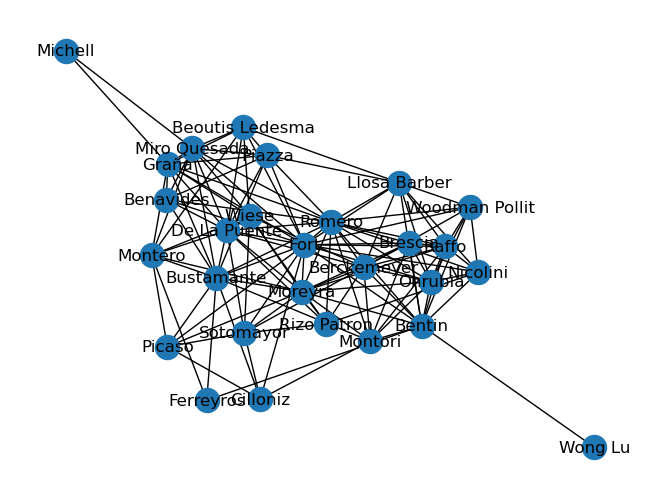

In [34]:
nx.draw(eliNet_giant,with_labels=True)

Basic summary:

In [35]:
# number of edges:
eliNet_giant.size()

133

In [36]:
# number of  nodes:
len(eliNet_giant)

28

The Trade graph is connected:

In [37]:
nx.is_connected(tradeNet)

True

The Top Tech is Seattle graph is connected too:

In [38]:
nx.is_connected(topsNet)

True

____

<a id='part2'></a>

## Network Exploration

<a id='part21'></a>

### Exploring the Network as a whole

* Density: from 0 to 1, where 1 makes it a 'complete' network: there is a link between every pair of nodes.

  <center><img src="https://cdn.fs.guides.co/PDn0ImTfSb6QwgIvdoQ8" width="500"></center>


What can we learn from this?

In [42]:
nx.density(eliNet_giant)

0.35185185185185186

In [43]:
nx.density(tradeNet)

0.2033952594490711

In [44]:
nx.density(topsNet)

0.37971014492753624

* Diameter: worst case escenario for number of steps for a node to contact another one (only for connected component). Also known as _maximum eccentricity_.

<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/diameter.jpeg" width="500"></center>

In [45]:
nx.diameter(eliNet_giant)

4

In [46]:
nx.diameter(tradeNet)

6

In [47]:
nx.diameter(topsNet)

3

* Local clustering coefficient of a node is away to measure the level of connectivity its neighbors. If all its neighbors are connected among one another, if they are totally connected, you get 1; if none of them is connected you get zero. Then, the average clustering coefficient tells you the average of those values.


In [26]:
# count_zeros=False to make results compatible with R!
nx.average_clustering(eliNet_giant,count_zeros=False)

0.6537018696117423

In [27]:
# Shorter path (average)
# shows the average number of steps it takes to get from one node to another.

nx.average_shortest_path_length(eliNet_giant)

1.7407407407407407

**Random networks** have *small shortest path* and *small clustering coefficient*...Is this the case?. The high clustering coefficient would suggest a **small world**, as most nodes are not neighbors of one another, but most nodes can be reached from every other in few steps.

* Transitivity: How probable is that two business men with a common business friend, are also friends.

In [28]:
nx.transitivity(eliNet_giant)

0.5829694323144105

* Assortativity (degree): it is a measure to see if nodes are connecting to other nodes similar in degree.  Closer to 1 means higher assortativity, closer to -1 diassortativity; while 0 is no assortitivity.

In [29]:
nx.degree_assortativity_coefficient(eliNet_giant)

-0.12086710760602014

You can also compute assortativity using an attribute of interest:

In [30]:
nx.attribute_assortativity_coefficient(eliNet_giant,'multi')

-0.07258064516129017

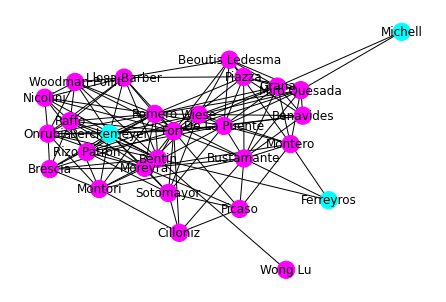

In [31]:
# coloring the nodes by attribute:
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['multi'] for n in eliNet_giant.nodes(data=True)]
nx.draw(eliNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True)

<a id='part22'></a>

### Exploration of network communities

A **clique** can be understood a community of nodes where all of them are connected to one another.

* How many cliques can be found in this network?

In [32]:
len([a for a in nx.enumerate_all_cliques(eliNet_giant)])

1074

If a clique in the network can not be bigger is you add another node, then you have a **maximal clique**.

* How many maximal cliques are there in this network?

In [33]:
nx.graph_number_of_cliques(eliNet_giant)

28

This is how you see every maximal clique:

In [34]:
for a in nx.find_cliques(eliNet_giant):
    print (a)

['Wiese', 'De La Puente', 'Sotomayor', 'Moreyra', 'Rizo Patron', 'Berckemeyer']
['Wiese', 'De La Puente', 'Montero', 'Beoutis Ledesma', 'Grana', 'Miro Quesada']
['Wiese', 'De La Puente', 'Montero', 'Moreyra']
['Ferreyros', 'Bustamante', 'Montero']
['Ferreyros', 'Bentin']
['Michell', 'Grana', 'Miro Quesada']
['Fort', 'Cilloniz', 'Picaso', 'Sotomayor']
['Fort', 'Cilloniz', 'Picaso', 'Bustamante']
['Fort', 'Romero', 'Raffo', 'Bentin', 'Onrubia', 'Brescia', 'Moreyra']
['Fort', 'Romero', 'Raffo', 'Bentin', 'Onrubia', 'Llosa Barber', 'Woodman Pollit', 'Nicolini']
['Fort', 'Romero', 'Grana', 'Bustamante', 'De La Puente', 'Piazza', 'Benavides', 'Miro Quesada']
['Fort', 'Romero', 'Bustamante', 'Moreyra', 'De La Puente']
['Fort', 'Romero', 'Piazza', 'Llosa Barber']
['Fort', 'Picaso', 'Moreyra', 'Sotomayor']
['Fort', 'Picaso', 'Moreyra', 'Bustamante']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Llosa Barber']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Miro Quesada', 'Grana', 'De La Puente']
['Fort', 'Soto

You can find the size of the _maximum clique_, largest clique in the graph, like this:

In [35]:
nx.graph_clique_number(eliNet_giant)

8

You can see each maximum clique like this:

In [36]:
[c for c in nx.find_cliques(eliNet_giant) if len(c) == nx.graph_clique_number(eliNet_giant)]

[['Fort',
  'Romero',
  'Raffo',
  'Bentin',
  'Onrubia',
  'Llosa Barber',
  'Woodman Pollit',
  'Nicolini'],
 ['Fort',
  'Romero',
  'Grana',
  'Bustamante',
  'De La Puente',
  'Piazza',
  'Benavides',
  'Miro Quesada'],
 ['Berckemeyer',
  'Romero',
  'Raffo',
  'Bentin',
  'Onrubia',
  'Brescia',
  'Moreyra',
  'Montori']]

If a network presents cliques makes you suspect that there can be **communities**.

This is a huge field of research, let me me show you one of the algorithms known as the [_Louvain method_](https://perso.uclouvain.be/vincent.blondel/research/louvain.html).

This algorithm can be installed using **pip install python-louvain**, and import it using **community**.


In [38]:
import community 
parts = community.best_partition(eliNet_giant)
parts

{'Romero': 0,
 'Grana': 2,
 'Miro Quesada': 2,
 'Moreyra': 0,
 'Fort': 1,
 'De La Puente': 2,
 'Wiese': 2,
 'Onrubia': 0,
 'Brescia': 0,
 'Nicolini': 0,
 'Montero': 2,
 'Picaso': 1,
 'Bentin': 0,
 'Benavides': 2,
 'Bustamante': 2,
 'Woodman Pollit': 0,
 'Raffo': 0,
 'Piazza': 2,
 'Berckemeyer': 0,
 'Llosa Barber': 0,
 'Beoutis Ledesma': 2,
 'Rizo Patron': 0,
 'Montori': 0,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 2,
 'Michell': 2,
 'Wong Lu': 0}

You can add that value as an attribute:

In [39]:
nx.set_node_attributes(eliNet_giant, parts,'community')

Now plot this attribute:

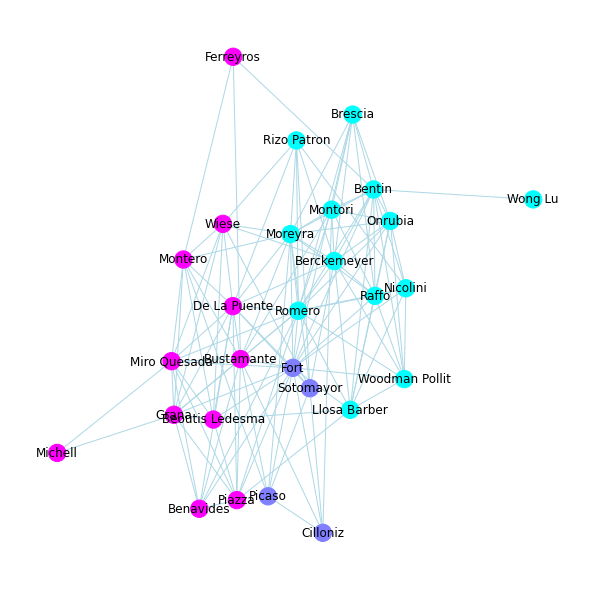

In [40]:
pos=nx.spring_layout(eliNet_giant, k=0.2) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['community'] for n in eliNet_giant.nodes(data=True)]
nx.draw(eliNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue')

Let's turn our attention to the nodes and their roles in the network.

<a id='part23'></a>

### Exploration of network actors

In [41]:
# Computing centrality measures:
degr=nx.degree_centrality(eliNet_giant)  # based on connections count
clos=nx.closeness_centrality(eliNet_giant) # "speed" to access the rest
betw=nx.betweenness_centrality(eliNet_giant,normalized=True) # "control flow" among the network nodes
eige=nx.eigenvector_centrality(eliNet_giant) # central nodes connected to central nodes (influential?)

In [42]:
# measures into a data frame:
Centrality=[ [rich, degr[rich],clos[rich],betw[rich],eige[rich]] for rich in eliNet_giant]
headers=['person','Degree','Closeness','Betweenness','Eigenvector']
DFCentrality=pandas.DataFrame(Centrality,columns=headers)
DFCentrality

,person,Degree,Closeness,Betweenness,Eigenvector
0,Romero,0.666667,0.750000,0.102156,0.327919
1,Grana,0.407407,0.613636,0.043353,0.185614
2,Miro Quesada,0.407407,0.613636,0.043353,0.185614
3,Moreyra,0.555556,0.675000,0.065573,0.271159
4,Fort,0.703704,0.771429,0.155165,0.321286
5,De La Puente,0.518519,0.658537,0.039053,0.246994
6,Wiese,0.333333,0.586957,0.017637,0.149863
7,Onrubia,0.407407,0.613636,0.006340,0.222147
8,Brescia,0.296296,0.574468,0.000747,0.178774
9,Nicolini,0.296296,0.562500,0.005603,0.162623


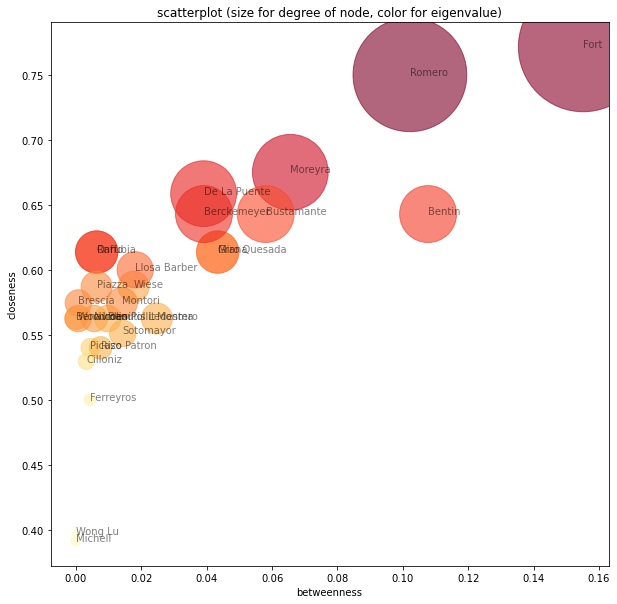

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
           c=DFCentrality.Eigenvector,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(DFCentrality['person'],DFCentrality['Betweenness'],DFCentrality['Closeness'])
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("scatterplot (size for degree of node, color for eigenvalue)")
plt.xlabel("betweenness")
plt.ylabel("closeness")
plt.show()

The node with the highest degree could be considered a _hub_ in the network:

In [44]:
# degr is a dictionary:
max(degr.keys(), key=(lambda k: degr[k]))

# or you can try:
#DFCentrality['person'].loc[DFCentrality['Degree'].idxmax()]

'Fort'

We can plot the neighbors of the hub, _its ego network_:

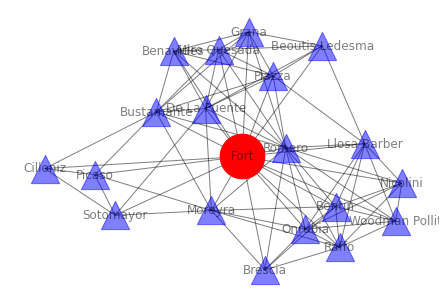

In [45]:
# Determine the hub name:
HubNode=max(degr.keys(), key=(lambda k: degr[k]))

# Get ego network of Hub
HubEgonet=nx.ego_graph(eliNet_giant,HubNode)

# prepare to plot:

## positions of the nodes
pos=nx.spring_layout(HubEgonet)

## plot whole ego network
nx.draw(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')

## make the hub salient
nx.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')

plt.show()

Can this network be disconnected? 
If so, we can compute the minimum number of nodes that must be removed to disconnect the network (create at least two components:

In [46]:
nx.node_connectivity(eliNet_giant)

1

Who is the sole node with the power to break the network?

In [47]:
list(nx.articulation_points(eliNet_giant))

['Bentin']

We can highlight the articulation node in the giant component:

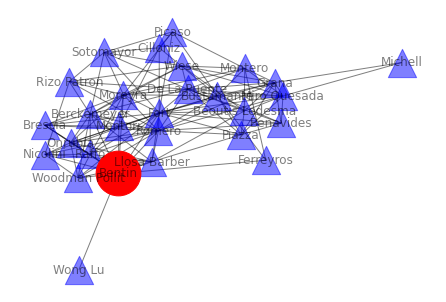

In [48]:
# saving the cut point
cut=list(nx.articulation_points(eliNet_giant))

# positions for all the nodes
pos=nx.spring_layout(eliNet_giant,k=0.5)

# sizes for nodes
SALIENT, NORMAL=(2000,800)

# plot all nodes
nx.draw(eliNet_giant,pos,node_color='b',node_size=NORMAL,with_labels=True, alpha=0.5,node_shape='^')

# make the cut salient:
nx.draw_networkx_nodes(eliNet_giant,pos,nodelist=cut,node_size=SALIENT,node_color='r')
plt.show()

_____

<a id='part3'></a>
## 3. Exporting the Data

In [49]:
nx.write_graphml(eliNet, "eliNetP.graphml",encoding='utf-8')
nx.write_gexf(eliNet, "eliNetP.gexf",encoding='utf-8')

____

* [Go to Course schedule](https://evansdatascience.github.io/GovernanceAnalytics/)